<a href="https://colab.research.google.com/github/zevan07/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Prevent truncation of pandas readouts
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
#import data
df_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(df_url)

In [5]:
#we see that the header looks wrong and verify this next
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
#wrong number of instances, first row contained in header
df.shape

(305, 4)

In [20]:
#we use the documentation on the UCI site to name each attribute and reimport
column_names = ['Age', 'Operation_year', 'Axillary_nodes', 'Survival_status']
df = pd.read_csv(df_url, names=column_names)
df.head()

,Age,Operation_year,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [106]:
#we now have the correct number of instances
df.shape

(306, 4)

In [11]:
#according to the documentation there should be no missing variables
#this is confirmed
df.isnull().sum()

Age                0
Operation_year     0
Axillary_nodes     0
Survival_status    0
dtype: int64

In [21]:
#since 1 and 2 are difficult to deal with, we change to:
#0 (survived < 5 years) and 1 (survived >= 5 years)
df['Survival_status'] = df['Survival_status'].map({2: 0, 1:1})

,Age,Operation_year,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [24]:
#verify changes
df['Survival_status'].describe

<bound method NDFrame.describe of 0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: Survival_status, Length: 306, dtype: int64>

In [25]:
#display of first 5 rows of final modifications
df.head()

,Age,Operation_year,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
#we'll use bins to make the data easier to deal with for crosstabs
year_bins = pd.cut(df['Operation_year'], 5)
age_bins = pd.cut(df['Age'], 6)
node_bins = pd.cut(df['Axillary_nodes'], 5)

In [0]:
#an even coarser grained view
year_bins_2 = pd.cut(df['Operation_year'], 2)
age_bins_2 = pd.cut(df['Age'], 1)
node_bins_2 = pd.cut(df['Axillary_nodes'], 1)

ct_2 = pd.crosstab(df['Survival_status'], [year_bins_2, age_bins_2, node_bins_2])

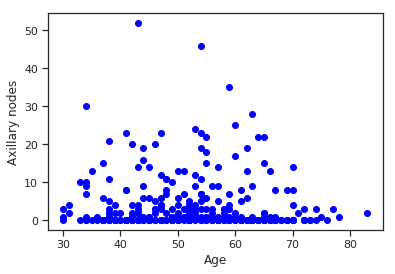

In [105]:
#plot age vs axillary nodes to get a sense of the distribution
fig,ax3 = plt.subplots()
ax3.set_xlabel('Age')
ax3.set_ylabel('Axillary nodes')
plt.scatter(df['Age'], df['Axillary_nodes'], color='blue')

In [114]:
#we'll to ascertain the effect of various things on survival status
#it's clear that the more nodes there are, the less likely one is to survive
#we can also see that age appears to actually have a negative effect when nodes are taken account of

ct = pd.crosstab(df['Survival_status'], [age_bins, node_bins])

ct

Age               (29.947, 40.6]                      (40.6, 51.2]  \
Axillary_nodes  (-0.052, 17.333] (17.333, 34.667] (-0.052, 17.333]   
Survival_status                                                      
0                              3                1               26   
1                             38                1               67   

Age                                                 (51.2, 61.8]  \
Axillary_nodes  (17.333, 34.667] (34.667, 52.0] (-0.052, 17.333]   
Survival_status                                                    
0                              4              1               24   
1                              1              0               64   

Age                                                 (61.8, 72.4]  \
Axillary_nodes  (17.333, 34.667] (34.667, 52.0] (-0.052, 17.333]   
Survival_status                                                    
0                              2              1               14   
1                              4              1               41   

Age                                  (72.4, 83.0]  
Axillary_nodes  (17.333, 34.667] (-0.052, 17.333]  
Survival_status                                    
0                              2                3  
1                              2                6

In [58]:
# this crosstab illustrates that operation year does not appear to have any effect on survival
ct_2 = pd.crosstab(df['Survival_status'], [year_bins, age_bins])
ct_2

Operation_year  (57.989, 60.2]                                         \
Age             (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
Survival_status                                                         
0                            1           10            6            7   
1                           19           17           21            9   

Operation_year                 (60.2, 62.4]                            \
Age             (72.4, 83.0] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
Survival_status                                                         
0                          1              0            2            5   
1                          0              3           15           12   

Operation_year                              (62.4, 64.6]               \
Age             (61.8, 72.4] (72.4, 83.0] (29.947, 40.6] (40.6, 51.2]   
Survival_status                                                         
0                          3            0              0           10   
1                          7            2              8           15   

Operation_year                                           (64.6, 66.8]  \
Age             (51.2, 61.8] (61.8, 72.4] (72.4, 83.0] (29.947, 40.6]   
Survival_status                                                         
0                          3            3            0              2   
1                         15            6            1              5   

Operation_year                                                       \
Age             (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (72.4, 83.0]   
Survival_status                                                       
0                          4            9            2            2   
1                         13            7           11            1   

Operation_year    (66.8, 69.0]                                         \
Age             (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
Survival_status                                                         
0                            1            5            4            1   
1                            4            8           14           10   

Operation_year                
Age             (72.4, 83.0]  
Survival_status               
0                          0  
1                          2

In [0]:
#saving this error so I can try to figure it out later
pt = pd.pivot_table(df, values='Survival_status', index=age_bins)

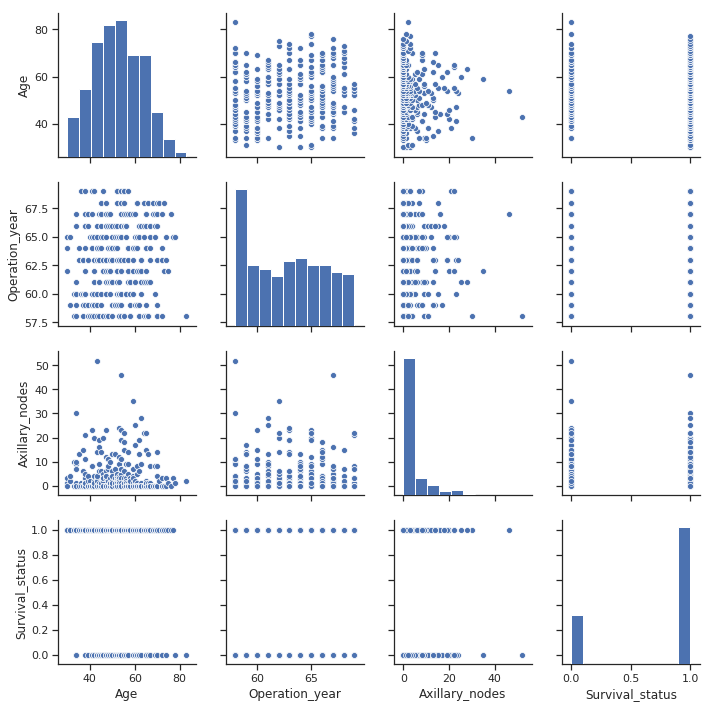

In [65]:
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*   Age has a slight positive relationship with survival (see crosstab 1). However, upon closer inspection (after accounting for the effect of axillary nodes), the effect of age on survival might actually be negative.
*   The amount of axillary nodes has a negative relationship with survival (see crosstab 1). 
*   Since the preponderance of data is from people in their 50s through 70s who survived (see top left of pairplot), this gives the impression of age having a greater effect on treatment outcomes. Age and survival may have a spurious relationship with axillary nodes as the confounder. Additionally, there is a survivorship bias problem because having lived longer is a sign of good health. Finally, the amount of nodes might in some cases indicate the rate of spread of the cancer, so if there are many nodes at a young age, this might indicate a particularly aggressive form of cancer.


